In [1]:
from glob import glob
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import platform
if platform.system() == 'Darwin':
    DATA_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Data.nosync"
    ROOT_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Thesis"
elif platform.system() == 'Linux':
    DATA_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync"
    ROOT_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Thesis"

current_wd = os.getcwd()

In [3]:
experiment_name = "00005-stylegan2_ada_images-mirror-auto2-kimg5000-resumeffhq512"
experiment_path = f"{DATA_PATH}/Models/Stylegan2_Ada/Experiments/" + experiment_name
experiment_path

'/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync/Models/Stylegan2_Ada/Experiments/00005-stylegan2_ada_images-mirror-auto2-kimg5000-resumeffhq512'

### FID50k Full

In [4]:
def read_metrics_files(metric_name):
    df = pd.read_json(experiment_path + f'/metric-{metric_name}.jsonl', lines=True)
    df[metric_name] = df.results.map(lambda x: x[metric_name])
    df = df[['snapshot_pkl', metric_name]]
    return df

In [5]:
fid50k_full = read_metrics_files('fid50k_full')
fid50k_full.drop_duplicates(subset='snapshot_pkl', keep='first', inplace=True)
fid50k_full

,snapshot_pkl,fid50k_full
0,network-snapshot-000000.pkl,240.692890
1,network-snapshot-000040.pkl,26.336447
2,network-snapshot-000080.pkl,18.512941
3,network-snapshot-000120.pkl,15.141141
4,network-snapshot-000160.pkl,13.758268
5,network-snapshot-000200.pkl,13.013073
6,network-snapshot-000240.pkl,13.152797
7,network-snapshot-000280.pkl,11.875273
8,network-snapshot-000320.pkl,10.479806
9,network-snapshot-000360.pkl,18.047125


### KID50k Full

In [6]:
kid50k_full = read_metrics_files('kid50k_full')
kid50k_full.drop_duplicates(subset='snapshot_pkl', keep='first', inplace=True)
kid50k_full

,snapshot_pkl,kid50k_full
0,network-snapshot-000000.pkl,0.269798
1,network-snapshot-000200.pkl,0.004777
2,network-snapshot-000400.pkl,0.003992
3,network-snapshot-000600.pkl,0.002919
4,network-snapshot-000800.pkl,0.002948
5,network-snapshot-001000.pkl,0.002221
6,network-snapshot-001200.pkl,0.002102
7,network-snapshot-001400.pkl,0.005534
8,network-snapshot-001600.pkl,0.002852
9,network-snapshot-001800.pkl,0.037367


### IS50k

In [7]:
is50k = pd.read_json(experiment_path + f'/metric-is50k.jsonl', lines=True)
is50k['is50k_mean'] = is50k.results.map(lambda x: x['is50k_mean'])
is50k['is50k_std'] = is50k.results.map(lambda x: x['is50k_std'])
is50k = is50k[['snapshot_pkl', 'is50k_mean', 'is50k_std']]
is50k.drop_duplicates(subset='snapshot_pkl', keep='first', inplace=True)
is50k

,snapshot_pkl,is50k_mean,is50k_std
0,network-snapshot-000000.pkl,2.341524,0.017786
1,network-snapshot-000200.pkl,3.556364,0.019107
2,network-snapshot-000400.pkl,3.548902,0.031298
3,network-snapshot-000600.pkl,3.331414,0.023144
4,network-snapshot-000800.pkl,3.632951,0.030049
5,network-snapshot-001000.pkl,3.585301,0.027572
6,network-snapshot-001200.pkl,3.583607,0.025020
7,network-snapshot-001400.pkl,3.445694,0.028395
8,network-snapshot-001600.pkl,3.335925,0.024546
9,network-snapshot-001800.pkl,3.655360,0.033973


### PR50k3_full

In [8]:
pr50k3_full =  pd.read_json(experiment_path + f'/metric-pr50k3_full.jsonl', lines=True)
pr50k3_full['pr50k3_full_precision'] = pr50k3_full.results.map(lambda x: x['pr50k3_full_precision'])
pr50k3_full['pr50k3_full_recall'] = pr50k3_full.results.map(lambda x: x['pr50k3_full_recall'])
pr50k3_full = pr50k3_full[['snapshot_pkl', 'pr50k3_full_precision', 'pr50k3_full_recall']]
pr50k3_full

,snapshot_pkl,pr50k3_full_precision,pr50k3_full_recall
0,network-snapshot-000000.pkl,0.00000,0.000000
1,network-snapshot-000200.pkl,0.69994,0.145306
2,network-snapshot-000400.pkl,0.71788,0.173329
3,network-snapshot-000600.pkl,0.72856,0.166572
4,network-snapshot-000800.pkl,0.72416,0.238122
5,network-snapshot-001000.pkl,0.71076,0.281294
6,network-snapshot-001200.pkl,0.69600,0.289900
7,network-snapshot-001400.pkl,0.60158,0.125320
8,network-snapshot-001600.pkl,0.67406,0.183286
9,network-snapshot-001800.pkl,0.05542,0.001422


### Merge all

In [9]:
metrics = reduce(lambda  left,right: pd.merge(left,right,on=['snapshot_pkl'],
                                            how='inner'), [fid50k_full, kid50k_full, is50k, pr50k3_full])
metrics['step'] = metrics.snapshot_pkl.apply(lambda x: int(x.split('-')[-1].split('.')[0]))
metrics.set_index('step', inplace=True)
metrics

,snapshot_pkl,fid50k_full,kid50k_full,is50k_mean,is50k_std,pr50k3_full_precision,pr50k3_full_recall
step,,,,,,,
0,network-snapshot-000000.pkl,240.692890,0.269798,2.341524,0.017786,0.00000,0.000000
200,network-snapshot-000200.pkl,13.013073,0.004777,3.556364,0.019107,0.69994,0.145306
400,network-snapshot-000400.pkl,11.397728,0.003992,3.548902,0.031298,0.71788,0.173329
600,network-snapshot-000600.pkl,10.456086,0.002919,3.331414,0.023144,0.72856,0.166572
800,network-snapshot-000800.pkl,9.994224,0.002948,3.632951,0.030049,0.72416,0.238122
1000,network-snapshot-001000.pkl,7.750768,0.002221,3.585301,0.027572,0.71076,0.281294
1200,network-snapshot-001200.pkl,7.523158,0.002102,3.583607,0.025020,0.69600,0.289900
1400,network-snapshot-001400.pkl,12.997152,0.005534,3.445694,0.028395,0.60158,0.125320
1600,network-snapshot-001600.pkl,9.602093,0.002852,3.335925,0.024546,0.67406,0.183286


### Plot Curves

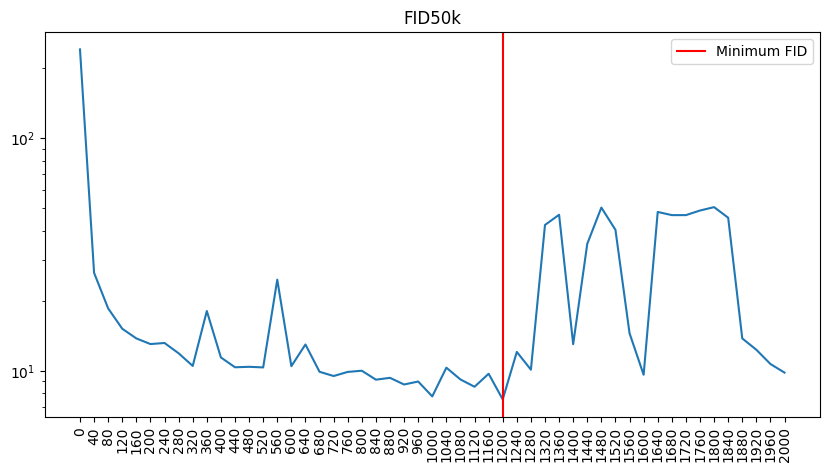

In [10]:
fid50k_full['step'] = fid50k_full.snapshot_pkl.apply(lambda x: int(x.split('-')[-1].split('.')[0]))

fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(fid50k_full.set_index('step').fid50k_full)
ax.set_yscale('log')
plt.title('FID50k')
plt.axvline(fid50k_full.iloc[fid50k_full.fid50k_full.argmin()].step, 0, 100, color ='red', label = 'Minimum FID')
plt.xticks(fid50k_full.set_index('step').index)
ax.set_xticklabels(fid50k_full.set_index('step').index, rotation=90)
plt.legend()
plt.show()

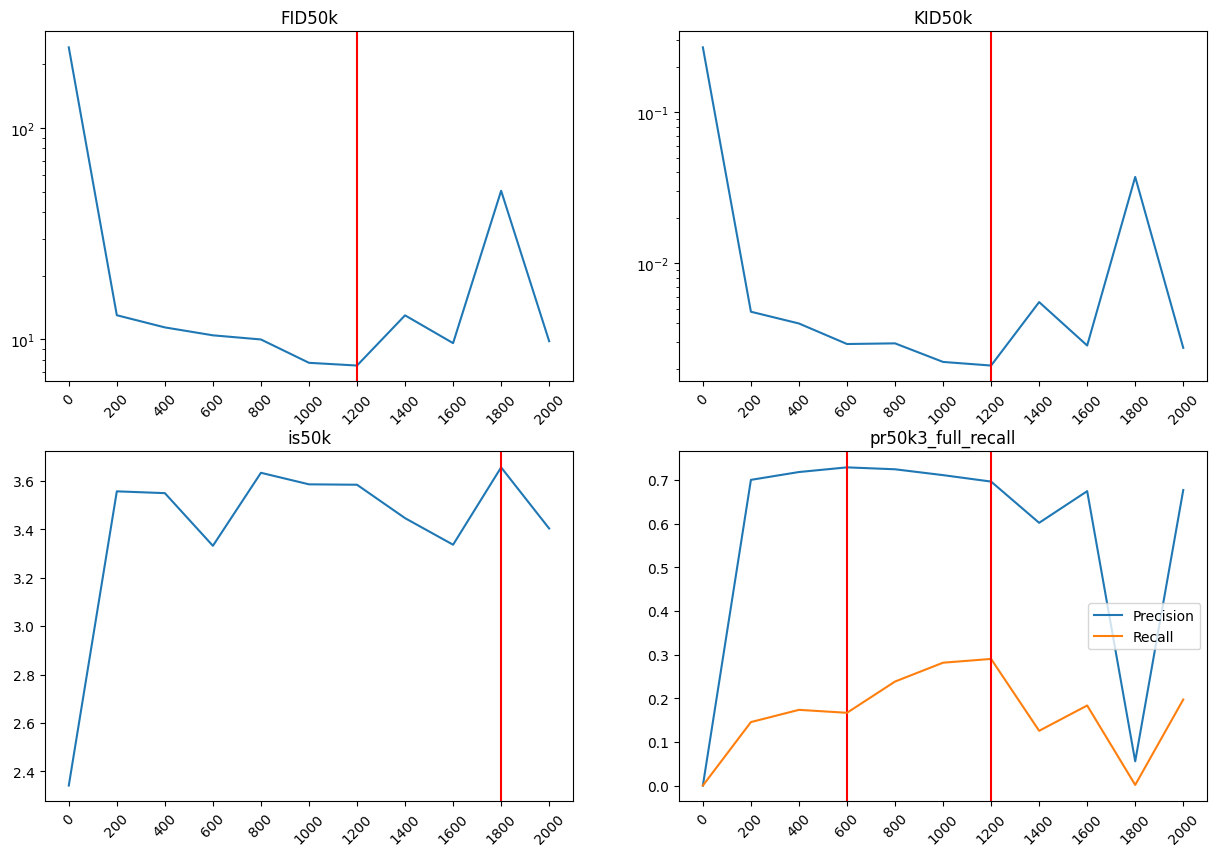

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# FID50k
ax[0, 0].plot(metrics.index, metrics['fid50k_full'])
ax[0, 0].set_yscale('log')
ax[0, 0].set_xticks(metrics.index)
ax[0, 0].set_xticklabels(metrics.index, rotation=45) 
ax[0, 0].set_title('FID50k')
ax[0,0 ].axvline(metrics.iloc[metrics.fid50k_full.argmin(),:].name, 0, 100, color='red')


# KID50k
ax[0, 1].plot(metrics.index, metrics['kid50k_full'])
ax[0, 1].set_yscale('log')
ax[0, 1].set_xticks(metrics.index)
ax[0, 1].set_xticklabels(metrics.index, rotation=45) 
ax[0, 1].set_title('KID50k')
ax[0, 1].axvline(metrics.iloc[metrics.kid50k_full.argmin(),:].name, 0, 100, color='red')

# IS50k
ax[1, 0].plot(metrics.index, metrics['is50k_mean'])
ax[1, 0].set_xticks(metrics.index)
ax[1, 0].set_xticklabels(metrics.index, rotation=45) 
ax[1, 0].set_title('is50k')
ax[1, 0].axvline(metrics.iloc[metrics.is50k_mean.argmax(),:].name, 0, 100, color='red')

# PR50k
ax[1, 1].plot(metrics.index, metrics['pr50k3_full_precision'], label='Precision')
ax[1, 1].set_xticks(metrics.index)
ax[1, 1].set_xticklabels(metrics.index, rotation=45) 
ax[1, 1].set_title('pr50k3_full_precision')
ax[1, 1].axvline(metrics.iloc[metrics.pr50k3_full_precision.argmax(),:].name, 0, 100, color='red')

ax[1, 1].plot(metrics.index, metrics['pr50k3_full_recall'], label = 'Recall')
ax[1, 1].set_xticks(metrics.index)
ax[1, 1].set_xticklabels(metrics.index, rotation=45) 
ax[1, 1].set_title('pr50k3_full_recall')
ax[1, 1].axvline(metrics.iloc[metrics.pr50k3_full_recall.argmax(),:].name, 0, 100, color='red')

ax[1,1].legend()

plt.show()